In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

stock_data = yf.download("TSLA", start="2025-01-01")
stock_data.head(10)

/tmp/ipython-input-3044417144.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download("TSLA", start="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2025-01-02,379.279999,392.730011,373.040009,390.100006,109710700
2025-01-03,410.440002,411.880005,379.450012,381.480011,95423300
2025-01-06,411.049988,426.429993,401.700012,423.200012,85516500
2025-01-07,394.359985,414.329987,390.000000,405.829987,75699500
2025-01-08,394.940002,402.500000,387.399994,392.950012,73038800
2025-01-10,394.739990,399.279999,377.290009,391.399994,62287300
2025-01-13,403.309998,403.790009,380.070007,383.209991,67580500
2025-01-14,396.359985,422.640015,394.540009,414.339996,84565000


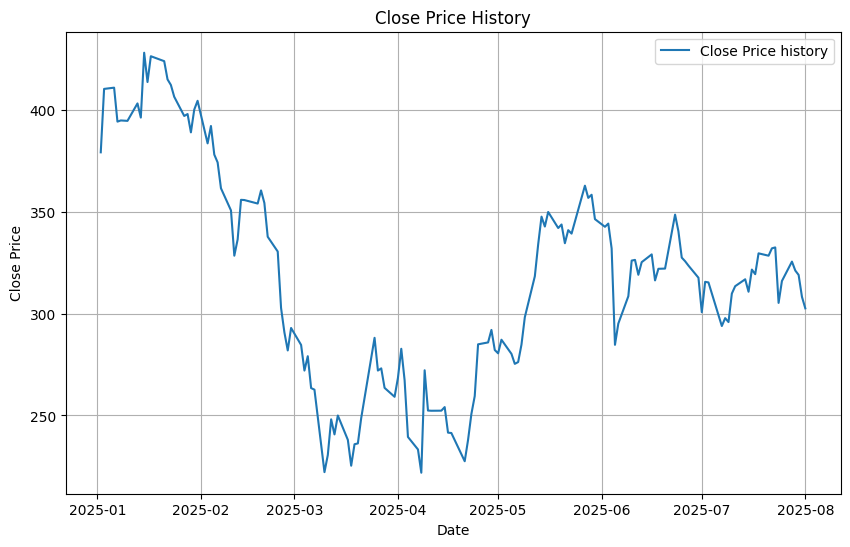

In [52]:
plt.figure(figsize=(10,6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### ADF Test to check Stationarity

In [53]:
## ADF test
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
  result = adfuller(series)
  print('ADF Statistic:', result[0])
  print('p-value:', result[1])

  for key, value in result[4].items():
    print('Critial Value (%s): %.3f' % (key, value))

###  KPSS test to check Stationarity

In [54]:
## KPSS test
from statsmodels.tsa.stattools import kpss

def kpss_test(series):
  result = kpss(series, regression='C')
  print('KPSS Statistic:', result[0])
  print('p-value:', result[1])
  for key, value in result[3].item():
    print('Critial Value (%s): %.3f' % (key, value))

In [55]:
prices = stock_data['Close']

### ADF test on stock data to check if it's stationary

In [56]:
adf_test(prices)

ADF Statistic: -1.788596133115473
p-value: 0.3861379142617492
Critial Value (1%): -3.477
Critial Value (5%): -2.882
Critial Value (10%): -2.578


### p_value is greater than 0.05, so the data is not stationary

### This time using the Seasonal Adjustment Technique, to make data stationary

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

## it uses moving average...
decomposition = seasonal_decompose(prices['TSLA'], model='additive', period=30) # Decompose the 'TSLA' column
prices_adjusted = prices['TSLA'] / decomposition.seasonal # Divide the 'TSLA' column by the seasonal component
prices_adjusted =  prices_adjusted.dropna()

In [80]:
adf_test(prices_adjusted)

ADF Statistic: -3.5958346809904516
p-value: 0.005841160837721469
Critial Value (1%): -3.481
Critial Value (5%): -2.884
Critial Value (10%): -2.579


### p_value is lesser than threshold, means data is now stationary

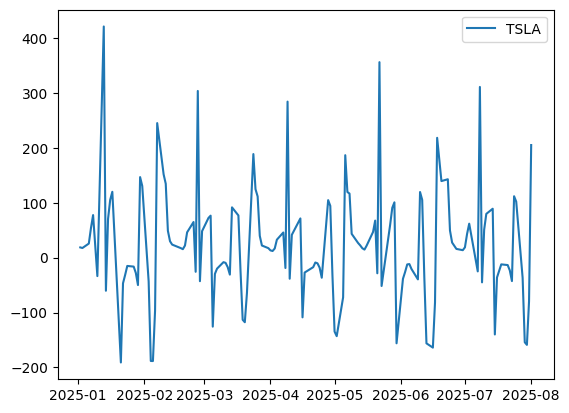

In [81]:
plt.plot(prices_adjusted, label='TSLA')
plt.legend()
plt.show()

end here!